In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Exploring the Dataset

In [3]:
df = pd.read_csv("../data/code-mixed-lid-dataset.csv", index_col=0)
df["len"] = df.apply(lambda x: len(eval(x.text)), axis=1)
df = df.sort_values(by="len")
df

,tweet_id,text,lang,len
1569,899280848834355201,"['@spn_cricket', 'shikar']","['rest', 'hi']",2
5093,148372457164779520,"['Jeej', '#sarcasm']","['hi', 'rest']",2
5119,176675253047660544,"['GGREEAAT', '#sarcasm']","['hi', 'rest']",2
5105,167022234282622976,"['@JayTheWanted', 'haahaa', '#irony']","['rest', 'hi', 'rest']",3
4488,899281110193946626,"['@SPN_Cricket', 'shikar', 'dhavan']","['rest', 'hi', 'hi']",3
...,...,...,...,...
5130,182461290885808130,"['Maid', ':', 'Aapke', 'Liye', 'Phone', 'Tha',...","['en', 'rest', 'hi', 'hi', 'en', 'hi', 'hi', '...",37
2608,899295163121401856,"['TUTI', 'Patriots', '110/3', '(', '15', '.', ...","['hi', 'hi', 'rest', 'rest', 'rest', 'rest', '...",37
3731,908750365050281984,"['BIJ', 'won', 'by', '1', 'run', '.', 'BLB', '...","['hi', 'en', 'en', 'rest', 'en', 'rest', 'hi',...",38
4013,908235748561780737,"['Cricket', '_', 'News', ':', '15', '_', 'Sep'...","['en', 'rest', 'en', 'rest', 'rest', 'rest', '...",38


In [9]:
def get_lang_of_tweet(langs:list):
    x = list(set(eval(langs)))
    if len(x) == 1 and x[0] == "rest":
        x = "rest"
    else:
        x = " ".join(x).replace("rest", "").strip()
    return x
    
df["tweet_lang"] = df.apply(lambda x:get_lang_of_tweet(langs=x.lang), axis=1)
df

,tweet_id,text,lang,len,tweet_lang
1569,899280848834355201,"['@spn_cricket', 'shikar']","['rest', 'hi']",2,hi
5093,148372457164779520,"['Jeej', '#sarcasm']","['hi', 'rest']",2,hi
5119,176675253047660544,"['GGREEAAT', '#sarcasm']","['hi', 'rest']",2,hi
5105,167022234282622976,"['@JayTheWanted', 'haahaa', '#irony']","['rest', 'hi', 'rest']",3,hi
4488,899281110193946626,"['@SPN_Cricket', 'shikar', 'dhavan']","['rest', 'hi', 'hi']",3,hi
...,...,...,...,...,...
5130,182461290885808130,"['Maid', ':', 'Aapke', 'Liye', 'Phone', 'Tha',...","['en', 'rest', 'hi', 'hi', 'en', 'hi', 'hi', '...",37,hi en
2608,899295163121401856,"['TUTI', 'Patriots', '110/3', '(', '15', '.', ...","['hi', 'hi', 'rest', 'rest', 'rest', 'rest', '...",37,en hi
3731,908750365050281984,"['BIJ', 'won', 'by', '1', 'run', '.', 'BLB', '...","['hi', 'en', 'en', 'rest', 'en', 'rest', 'hi',...",38,en hi
4013,908235748561780737,"['Cricket', '_', 'News', ':', '15', '_', 'Sep'...","['en', 'rest', 'en', 'rest', 'rest', 'rest', '...",38,hi en


### Language Distribution of Tweets

In [10]:
df.tweet_lang.value_counts().rename_axis('lang').reset_index(name='counts')

,lang,counts
0,en hi,3531
1,hi en,1006
2,hi,711
3,en,1
4,rest,1


### Length Distribution of Tweets

Length = number of tokens in tweet

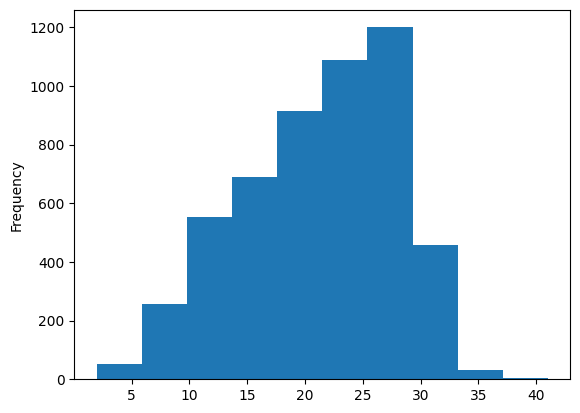

In [11]:
ax = df["len"].plot(kind="hist", xlabel="tweet length in tokens", ylabel="counts")

In [26]:
expanded_df = []

def expand(t_id:str, text:list, lang:list):
    for i, (x,y) in enumerate(zip(text, lang)):
        expanded_df.append({"tweet_id":t_id, "idx":i, "text":x, "lang":y})

df.apply(lambda x: expand(t_id=x.tweet_id, text=eval(x.text), lang=eval(x.lang)), axis=1)


def replace_hashtag_mention(x:str):
    if x.startswith("@"):
        return "@_"
    elif x.startswith("#"):
        return "#_"
    else:
        return x.lower().strip()


expanded_df = pd.DataFrame(expanded_df)
expanded_df["word"] = expanded_df.apply(lambda x:replace_hashtag_mention(x=x.text), axis=1)
expanded_df

,tweet_id,idx,text,lang,word
0,899280848834355201,0,@spn_cricket,rest,@_
1,899280848834355201,1,shikar,hi,shikar
2,148372457164779520,0,Jeej,hi,jeej
3,148372457164779520,1,#sarcasm,rest,#_
4,176675253047660544,0,GGREEAAT,hi,ggreeaat
...,...,...,...,...,...
111350,903641402294153216,36,thanda,hi,thanda
111351,903641402294153216,37,.,rest,.
111352,903641402294153216,38,pad,hi,pad
111353,903641402294153216,39,.,rest,.


### Token Level Language Statistics

array([<Axes: ylabel='lang'>], dtype=object)

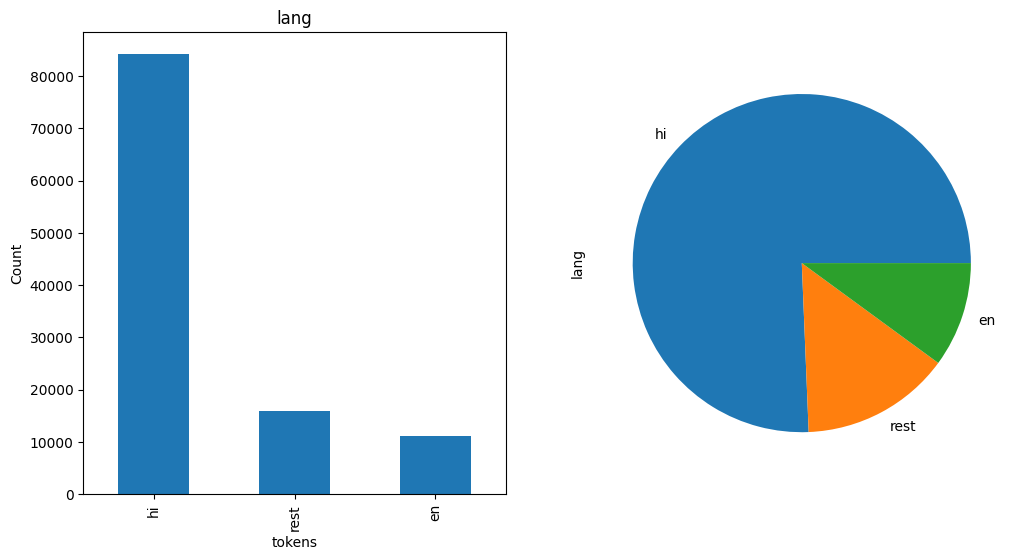

In [27]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
expanded_df.lang.value_counts().plot(kind="bar", xlabel="tokens", ylabel="Count", ax = axes[0], subplots=True)
expanded_df.lang.value_counts().plot(x="lang", kind="pie", ax = axes[1], subplots=True)

In [28]:
lowercased_word_df = expanded_df.word.value_counts().rename_axis('unique_word_types').reset_index(name='counts')
lowercased_word_df = lowercased_word_df.sort_values(by="counts")
lowercased_word_df

,unique_word_types,counts
7342,manine,1
9783,blind,1
9784,flower,1
9785,sarkaro,1
9786,peechein,1
...,...,...
4,",",1835
3,ki,1890
2,.,2756
1,#_,3646


### Finding and Fixing Ambiguous Word Types

In [29]:
def get_lang_of_word(word:str):
    return "-".join(list(set(expanded_df[expanded_df.word==word].lang.tolist())))

lowercased_word_df["lang"] = lowercased_word_df.apply(lambda x:get_lang_of_word(word=x.unique_word_types), axis=1)
lowercased_word_df

,unique_word_types,counts,lang
7342,manine,1,hi
9783,blind,1,en
9784,flower,1,en
9785,sarkaro,1,hi
9786,peechein,1,hi
...,...,...,...
4,",",1835,rest
3,ki,1890,hi
2,.,2756,rest
1,#_,3646,rest


hi         12061
en          1833
rest         707
hi-en         42
en-hi         40
rest-hi        2
Name: lang, dtype: int64

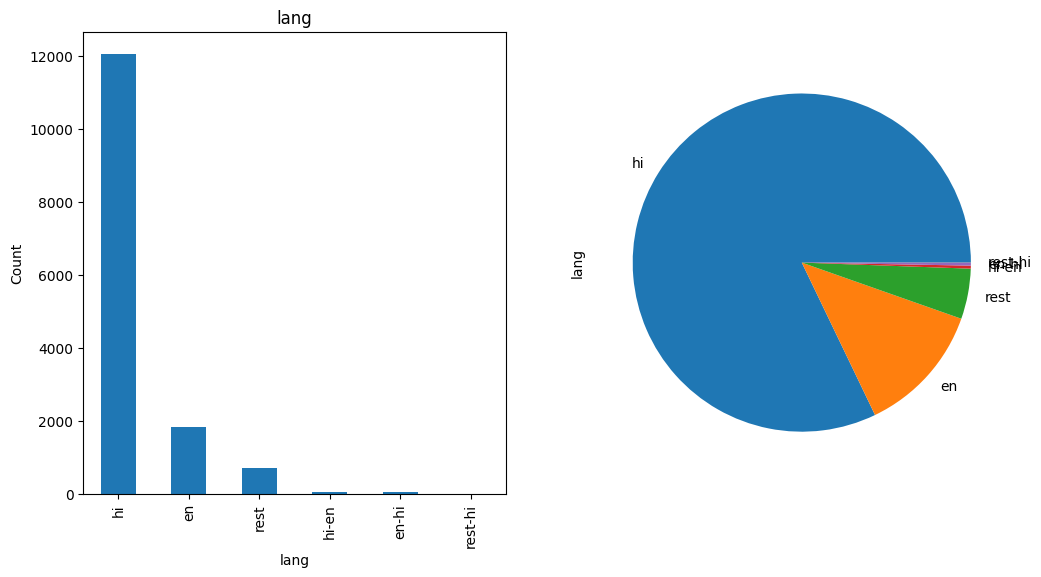

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
lowercased_word_df.lang.value_counts().plot(kind="bar", xlabel="lang", ylabel="Count", ax = axes[0], subplots=True)
lowercased_word_df.lang.value_counts().plot(x="lang", kind="pie", ax = axes[1], subplots=True)
lowercased_word_df.lang.value_counts()

#### Ambiguous Instances

In [39]:
hi_en_amb = lowercased_word_df[(lowercased_word_df.lang=="en-hi") | (lowercased_word_df.lang=="hi-en")]
hi_en_amb[50:]

,unique_word_types,counts,lang
1173,urdu,10,hi-en
1060,si,11,hi-en
1072,ta,11,en-hi
1109,toilet,11,hi-en
1073,den,11,hi-en
980,mr,12,hi-en
905,abey,13,hi-en
950,bibi,13,en-hi
855,sa,14,en-hi
874,nam,14,en-hi


In [37]:
lowercased_word_df[lowercased_word_df.lang=="rest-hi"]

,unique_word_types,counts,lang
452,kapoor,27,rest-hi
8,se,1245,rest-hi


#### Correction - 879903092048707585

In [42]:
expanded_df.loc[((expanded_df.te=="se") & (expanded_df.lang=="rest")), "lang"] = "hi"
expanded_df[(expanded_df.text=="se") & (expanded_df.lang=="rest")]

,tweet_id,idx,text,lang,word


#### Correction - 900713705637269504

In [48]:
expanded_df.loc[((expanded_df.text=="Kapoor") & (expanded_df.lang=="rest")), "lang"] = "hi"
expanded_df[(expanded_df.text=="Kapoor") & (expanded_df.lang=="rest")]

,tweet_id,idx,text,lang,word


In [49]:
word_df = expanded_df.word.value_counts().rename_axis('unique_word_types').reset_index(name='counts')
word_df = word_df.sort_values(by="counts")
word_df["lang"] = word_df.apply(lambda x:get_lang_of_word(word=x.unique_word_types), axis=1)

In [54]:
word_df["lang"] = word_df.apply(lambda x:x.lang.replace("hi-en", "en-hi"),axis=1)
word_df.lang.value_counts()

hi       12063
en        1833
rest       707
en-hi       82
Name: lang, dtype: int64

### Word Length Distribution

In [56]:
word_df["len"] = word_df.apply(lambda x:len(x.unique_word_types), axis=1)
word_df = word_df.sort_values(by="len", ascending=False)
word_df.head(5)

,unique_word_types,counts,lang,len
6398,yayayayayayayyaayayayayayayayayyayayay,1,hi,38
12762,vikaas#tripletalaq#hindutvarashtra,1,hi,34
12351,tongue#acchedin#kaaladhan#sabka,1,hi,31
10097,hai#tripletalaq#ramrahimsingh,1,hi,29
8948,waaaaaaaaaaaaaaaaaaaaaaaaaaah,1,hi,29


In [61]:
word_df.to_csv("../data/word_lowercased_freq.csv")